<a href="https://colab.research.google.com/github/maheshkajjari/winedata/blob/master/wine2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #Wine dataset

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Before applying any ML algorithms in data, we need to understand the data which we are going to follow. Without data understanding there will be a possibility of ML model failure. The understanding of data is nothing but this EDA.

Analysis by Mahesh Kajjari

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
 df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=(';'))

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


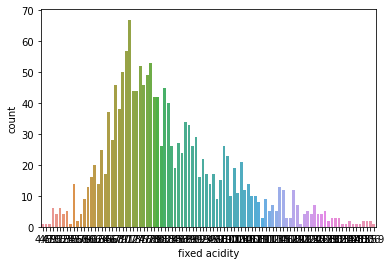

In [ ]:
sns.countplot(x='fixed acidity',data =df)

In [ ]:
df['fixed acidity'].mode()

0    7.2
dtype: float64

In [ ]:
df['fixed acidity'].median()

7.9

In [ ]:
import plotly.express as px

In [ ]:
def describe2(x):
    x1 = x.describe(percentiles = [0.5]).to_frame().T
    x1['mode'] = x.mode().values
    x1['variance'] = x1['std'] ** 2
    x1['skew'] = x.skew()
    return x1.T

In [ ]:
 describe2(df['quality'])

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
50%,6.000000
max,8.000000
mode,5.000000
variance,0.652168
skew,0.217802


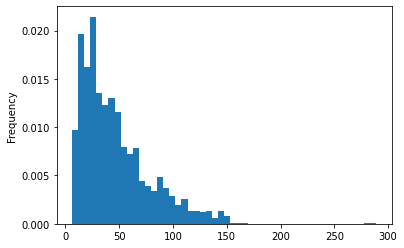

In [ ]:
df['total sulfur dioxide'].plot(kind='hist',bins=50,density = True)

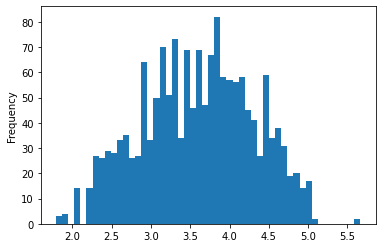

In [ ]:
np.log(df['total sulfur dioxide']).plot(kind='hist',bins=50)

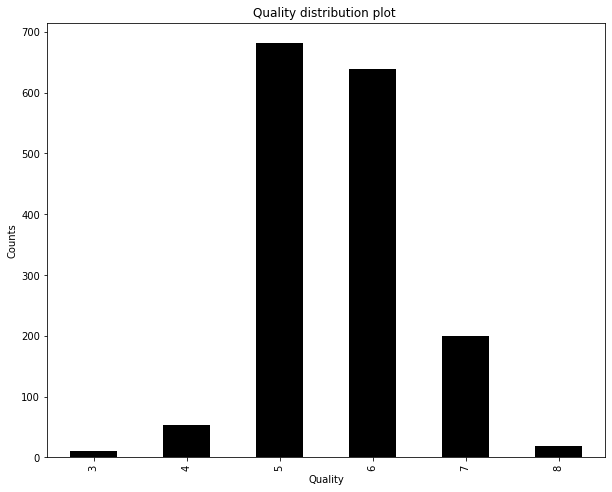

In [ ]:
plt.figure(figsize = (10 , 8))
plt.title("Quality distribution plot ")
plt.xlabel('Quality')
plt.ylabel("Counts")
df['quality'].value_counts().sort_index().plot(kind = 'bar',color = 'black')
plt.show()

In [ ]:
!pip3 install seaborn

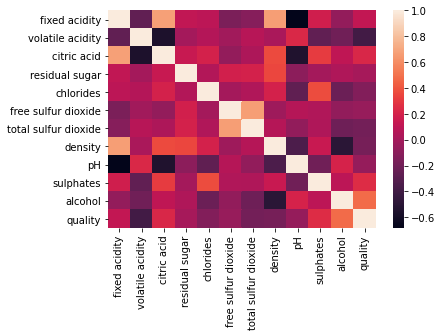

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


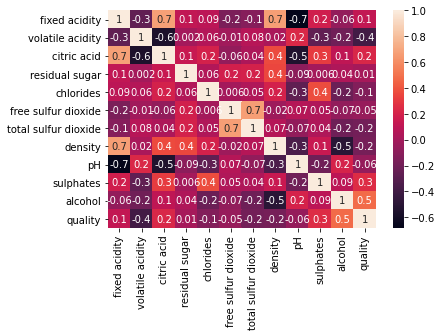

In [ ]:
sns.heatmap(df.corr(), annot = True ,fmt = '.1g')

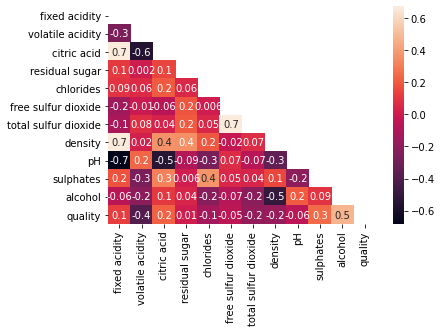

In [ ]:
matrix= np.triu(df.corr())
sns.heatmap(df.corr(), annot = True ,fmt = '.1g',mask = matrix)

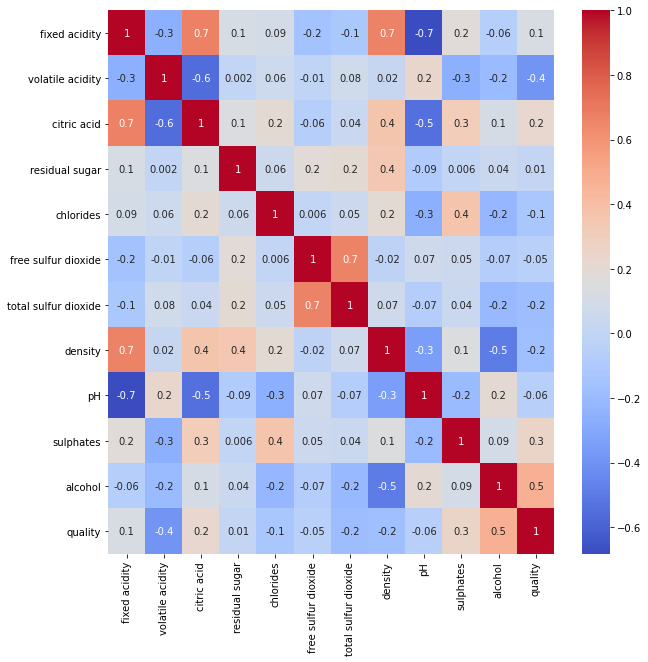

In [ ]:
plt.figure(figsize=(10,10))
matrix= np.triu(df.corr())
sns.heatmap(df.corr(), annot = True ,fmt = '.1g', cmap='coolwarm')

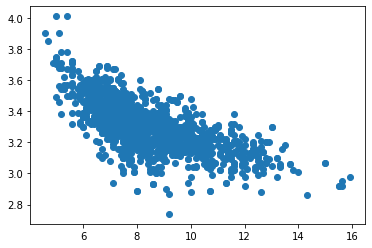

In [ ]:
plt.scatter(df['fixed acidity'],df['pH'])